<a href="https://colab.research.google.com/github/anasalek/Pyhton_hw/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%225_nlp_libraries_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [82]:
!pip install -q datasets

Загрузим датасет для анализа тональности текстов

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [ ]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [ ]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

counterP = 0
counterNeg = 0
counterNeu = 0

for elem in dataset['train']:
  if elem['sentiment'] == 'positive':
   counterP += 1
  elif elem['sentiment'] == 'negative':
    counterNeg += 1
  else:
      counterNeu +=1
print('Данные обучающей выборки:')
print(f'Положительные метки: {counterP}')
print(f'Отрицательные метки: {counterNeg}')
print(f'Нейтральные метки: {counterNeu}')
print()


vcounterP = 0
vcounterNeg = 0
vcounterNeu = 0
for elem in dataset['validation']:
  if elem['sentiment'] == 'positive':
   vcounterP += 1
  elif elem['sentiment'] == 'negative':
    vcounterNeg += 1
  else:
      vcounterNeu +=1
print('Данные валидационной выборки:')
print(f'Положительные метки: {vcounterP}\nОтрицательные метки: {vcounterNeg}\nНейтральные метки: {vcounterNeu}')
print()

#смотрите! list comprehension!
tcounterP = sum(1 for i in dataset['test'] if i['sentiment'] == 'positive')
tcounterNeg = sum(1 for i in dataset['test'] if i['sentiment'] == 'negative')
tcounterNeu = sum(1 for i in dataset['test'] if i['sentiment'] == 'neutral')
print('Данные тестовой выборки:')
print(f'Положительные метки: {tcounterP}\nОтрицательные метки: {tcounterNeg}\nНейтральные метки: {tcounterNeu}')

Данные обучающей выборки:
Положительные метки: 10478
Отрицательные метки: 9105
Нейтральные метки: 11649

Данные валидационной выборки:
Положительные метки: 1760
Отрицательные метки: 1517
Нейтральные метки: 1928

Данные тестовой выборки:
Положительные метки: 1730
Отрицательные метки: 1546
Нейтральные метки: 1930


In [ ]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке
# Так, либо я что-то не так сделала, либо их разделили на равные проценты и вы заставили это считать :(
partP = int(counterP / 31232 * 100)
partNeg = int(counterNeg / 31232 * 100)
partNeu = int(counterNeu / 31232 * 100)
print(f'Данные обучающей выборки:\nПоложительные метки составляют {partP}%\nОтрицательные метки {partNeg}%\nНейтральные метки {partNeu}%')
print('---')
vpartP = int(vcounterP / 5205 * 100)
vpartNeg = int(vcounterNeg / 5205 * 100)
vpartNeu = int(vcounterNeu / 5205 * 100)
print(f'Данные валидационной выборки:\nПоложительные метки составляют {vpartP}%\nОтрицательные метки {vpartNeg}%\nНейтральные метки {vpartNeu}%')
print('---')
tpartP = int(tcounterP / 5206 * 100)
tpartNeg = int(tcounterNeg / 5206 * 100)
tpartNeu = int(tcounterNeu / 5206 * 100)
print(f'Данные обучающей выборки:\nПоложительные метки составляют {tpartP}%\nОтрицательные метки {tpartNeg}%\nНейтральные метки {tpartNeu}%')

Данные обучающей выборки:
Положительные метки составляют 33%
Отрицательные метки 29%
Нейтральные метки 37%
---
Данные валидационной выборки:
Положительные метки составляют 33%
Отрицательные метки 29%
Нейтральные метки 37%
---
Данные обучающей выборки:
Положительные метки составляют 33%
Отрицательные метки 29%
Нейтральные метки 37%


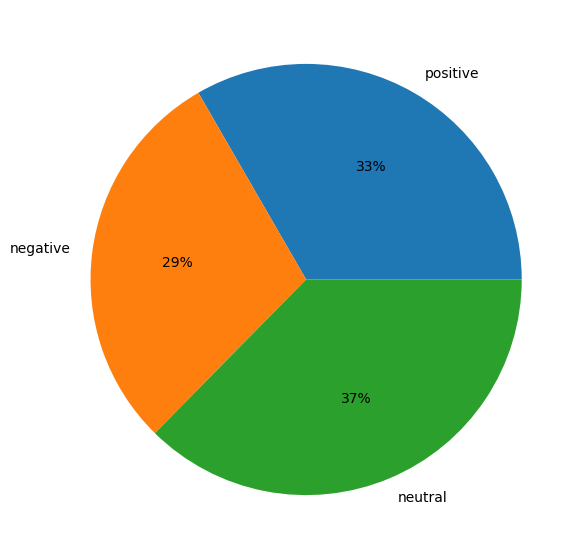

In [ ]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = 33, 29, 37

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

In [ ]:
# Сделаем то же самое для проверочной выборки
# Оно прям то же самое будет

In [ ]:
# Сделаем то же самое для тестовой выборки
# И тут тоже!

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [ ]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [ ]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [ ]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [ ]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [ ]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [ ]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [ ]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [ ]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [ ]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [ ]:
texts = dataset['train']['text']
texts[:5]
# Выведите первые 5 текстов

['Cooking microwave pizzas, yummy',
 'Any plans of allowing sub tasks to show up in the widget?',
 " I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha",
 ' naw idk what ur talkin about',
 ' That sucks to hear. I hate days like that']

2. Создадим список токенов для каждого текста с помощью SpaCy

In [ ]:
tokens_list = [] # создаю список
for text in texts[:100]: # из списка texts обрабатываю первые 100
  processed = nlp(text) # в переменной prosessed - результат обработки. он выглядит так же, как тексты. nlp применяется к каждому тексту (строке) из списка
  tokens = [token.text for token in processed] # новая переменная для записи каждого отдельного токена (слова) в предложении
  tokens_list.append(tokens) # в список добавляем по слову
print(tokens_list[:5])
# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов
# я не понимаю как в конце появляется список списков((( типа мы в списке texts каждое слово обработали, запихнули в новый список, почему новый список в курсе, что
# это разные предлежения? что это были разные элементы изначального списка

[['Cooking', 'microwave', 'pizzas', ',', 'yummy'], ['Any', 'plans', 'of', 'allowing', 'sub', 'tasks', 'to', 'show', 'up', 'in', 'the', 'widget', '?'], [' ', 'I', 'love', 'the', 'humor', ',', 'I', 'just', 'reworded', 'it', '.', 'Like', 'saying', "'", 'group', 'therapy', "'", 'instead`a', "'", 'gang', 'banging', "'", '.', 'Keeps', 'my', 'moms', 'off', 'my', 'back', '.', '  ', 'Hahaha'], [' ', 'naw', 'idk', 'what', 'ur', 'talkin', 'about'], [' ', 'That', 'sucks', 'to', 'hear', '.', 'I', 'hate', 'days', 'like', 'that']]


3. Частеречная разметка: создаем список частей речи для каждого токена

In [50]:
pos_list = [] # создаю список

for text in texts[:100]: # из списка texts обрабатываю первые 100
  processed = nlp(text) # в переменной prosessed - результат обработки. он выглядит так же, как тексты. nlp применяется к каждому тексту (строке) из списка
  pos = [item.pos_ for item in processed] # новая переменная для записи каждого отдельного токена (слова) в предложении
  pos_list.append(pos) # в список добавляем по слову
print(pos_list)

[['NOUN', 'NOUN', 'NOUN', 'PUNCT', 'ADJ'], ['DET', 'NOUN', 'ADP', 'VERB', 'NOUN', 'NOUN', 'PART', 'VERB', 'ADP', 'ADP', 'DET', 'NOUN', 'PUNCT'], ['SPACE', 'PRON', 'VERB', 'DET', 'NOUN', 'PUNCT', 'PRON', 'ADV', 'VERB', 'PRON', 'PUNCT', 'ADP', 'VERB', 'PUNCT', 'NOUN', 'NOUN', 'PART', 'NOUN', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'PUNCT', 'VERB', 'PRON', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'SPACE', 'PROPN'], ['SPACE', 'PROPN', 'NOUN', 'PRON', 'PROPN', 'PROPN', 'ADV'], ['SPACE', 'PRON', 'VERB', 'PART', 'VERB', 'PUNCT', 'PRON', 'VERB', 'NOUN', 'ADP', 'PRON'], ['SPACE', 'PROPN', 'INTJ', 'PUNCT', 'NOUN', 'ADV', 'DET', 'ADV', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'SCONJ', 'PROPN', 'PUNCT'], ['SPACE', 'PRON', 'AUX', 'PRON', 'VERB', 'PUNCT'], ['SPACE', 'PRON', 'AUX', 'VERB', 'PRON', 'DET', 'ADJ', 'PUNCT', 'SPACE', 'ADV', 'PRON', 'AUX', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'INTJ', 'PRON', 'VERB', 'PUNCT', 'SCONJ', 'DET', 'ADV', 'VERB', 'PUNCT', 'PUNCT', 'PUNCT'], ['AUX', 'ADJ', 'SCONJ', 'D

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [104]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

for i in range(len(pos_list)) and range(len(tokens_list)):
    print(f'Текст: {pos_list[i]}')
    for j in range(len(pos_list[i])) and range(len(tokens_list[i])):
      print(f'токен: {tokens_list[i][j]}, часть речи: {pos_list[i][j]}')
# сойдет?

Текст: ['NOUN', 'NOUN', 'NOUN', 'PUNCT', 'ADJ']
токен: Cooking, часть речи: NOUN
токен: microwave, часть речи: NOUN
токен: pizzas, часть речи: NOUN
токен: ,, часть речи: PUNCT
токен: yummy, часть речи: ADJ
Текст: ['DET', 'NOUN', 'ADP', 'VERB', 'NOUN', 'NOUN', 'PART', 'VERB', 'ADP', 'ADP', 'DET', 'NOUN', 'PUNCT']
токен: Any, часть речи: DET
токен: plans, часть речи: NOUN
токен: of, часть речи: ADP
токен: allowing, часть речи: VERB
токен: sub, часть речи: NOUN
токен: tasks, часть речи: NOUN
токен: to, часть речи: PART
токен: show, часть речи: VERB
токен: up, часть речи: ADP
токен: in, часть речи: ADP
токен: the, часть речи: DET
токен: widget, часть речи: NOUN
токен: ?, часть речи: PUNCT
Текст: ['SPACE', 'PRON', 'VERB', 'DET', 'NOUN', 'PUNCT', 'PRON', 'ADV', 'VERB', 'PRON', 'PUNCT', 'ADP', 'VERB', 'PUNCT', 'NOUN', 'NOUN', 'PART', 'NOUN', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'PUNCT', 'VERB', 'PRON', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'SPACE', 'PROPN']
токен:  , часть речи: SPACE
токен: I

5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [79]:
# Для каждого текста из выбранного среза: допишите этот код
for text in texts[7:19]:
  doc = nlp(text)

  # Применим к тексту nlp: допишите этот код
print([(ent, ent.label_) for ent in doc.ents]) # Выведем именованную сущность и ее лейбл

[(Early monday, 'DATE'), (Only a few weeks, 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [91]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
from spacy import displacy
displacy.render(nlp(texts[23]))